In [6]:
pip install pandas matplotlib seaborn scikit-learn


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB
Dataset shape (rows, columns): (185, 5)
Number of duplicate rows: 0
Missing values:
 Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64
Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


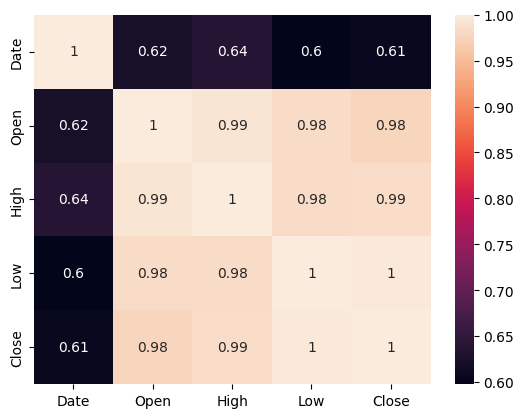

scatter plot


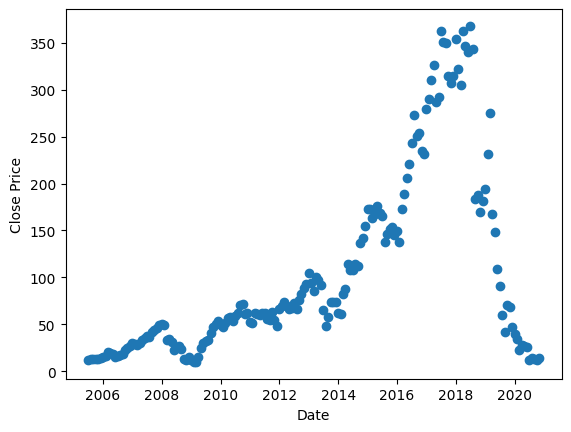

box plot


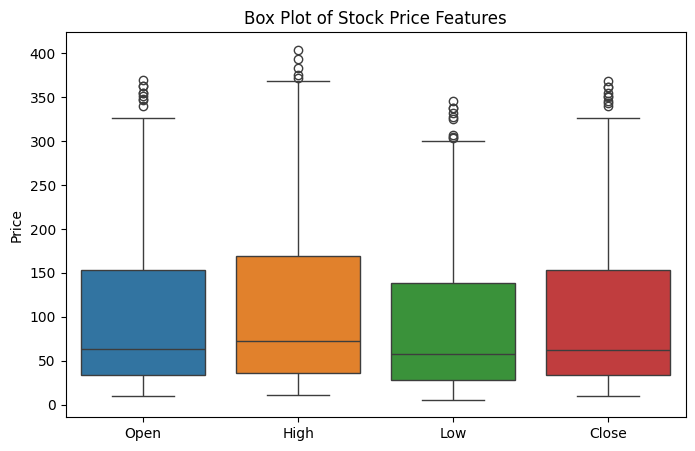

/tmp/ipython-input-10-1837298122.py:69: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(corr_matrix['Close'][0]) > 0.8 and abs(corr_matrix['Close'][1]) > 0.8 and abs(corr_matrix['Close'][2]) > 0.8:


 Hypothesis 1 not supported: Correlations are weak.
Linear Regression model
dates to test:        Open    High     Low
19    30.20   32.60   26.80
42    15.28   18.34   11.48
156  340.00  393.35  332.45
111  112.10  137.80  109.20
148  315.50  329.80  296.00
15    18.78   24.20   18.50
24    35.98   41.04   35.02
68    51.84   65.20   50.80
117  162.80  172.80  154.53
98    49.20   78.94   44.80
97    66.00   67.81   43.22
163  197.00  236.90  167.65
69    62.00   68.26   60.50
175   39.10   40.70   33.60
45    10.04   17.51    9.94
16    22.80   28.47   21.40
51    41.20   52.34   36.80
35    31.22   32.22   22.62
82    70.40   70.59   58.85
56    47.80   52.06   47.30
165  277.00  285.90  165.30
124  151.73  157.96  144.03
146  351.00  383.25  345.50
30    49.99   55.56   30.24
9     20.56   20.80   18.02
126  145.00  149.90  126.45
60    53.55   60.94   53.02
18    27.40   34.16   27.00
170   59.50   72.55   40.95
113  142.08  155.00  134.00
75    53.80   64.80   48.10
55    49.00  

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pickle


# loading of csv file
df = pd.read_csv('data_YesBank_StockPrices.csv')
df

# information of data
df.info()

# count of rows and columns
print("Dataset shape (rows, columns):", df.shape)

# count duplicate
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

# preprocessing data
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df = df.sort_values('Date')

# check for missing values
print("Missing values:\n", df.isnull().sum())

# columns of dataset
print(df.columns)

# unique value of each variable
df['Open'].unique()
df['Close'].unique()
df['High'].unique()
df['Low'].unique()
df['Date'].unique()

# drop missing values
df = df.dropna()

# correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# plotting of data
# scatter plot
print("scatter plot")
plt.scatter(df['Date'], df['Close'])
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

# boxplot
print("box plot")
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title("Box Plot of Stock Price Features")
plt.ylabel("Price")
plt.show()

# hypothesis testing 1
if abs(corr_matrix['Close'][0]) > 0.8 and abs(corr_matrix['Close'][1]) > 0.8 and abs(corr_matrix['Close'][2]) > 0.8:
    print(" Hypothesis 1 supported: Strong linear relationships found.")
else:
    print(" Hypothesis 1 not supported: Correlations are weak.")

# splitting of data
x = df[['Open', 'High', 'Low']]
y = df['Close']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# linear regression model1
print("Linear Regression model")
model1 = LinearRegression()
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
mse1 = mean_squared_error(y_test, y_pred1)
r2_1 = r2_score(y_test, y_pred1)

# printing of values
print("dates to test:", x_test)
print('actual_value:', y_test)
print('predicted value:', y_pred1)
print('mean squared error:', mse1)
print('r2 score:', r2_1)

# decision tree model2
print("Tuned Decision Tree Model")
param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5, scoring='r2')
grid_dt.fit(x_train, y_train)

best_dt = grid_dt.best_estimator_
y_pred2 = best_dt.predict(x_test)
mse2 = mean_squared_error(y_test, y_pred2)
r2_2 = r2_score(y_test, y_pred2)

print("Best parameters (Decision Tree):", grid_dt.best_params_)
print("dates to test:", x_test)
print("actual values:", y_test)
print("predicted values:", y_pred2)
print("mean squared error:", mse2)
print("r2 score:", r2_2)

# Random Forest model with GridSearchCV
print("Tuned Random Forest Model")
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_rf.fit(x_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred3 = best_rf.predict(x_test)
mse3 = mean_squared_error(y_test, y_pred3)
r2_3 = r2_score(y_test, y_pred3)

print("Best parameters (Random Forest):", grid_rf.best_params_)
print("dates to test:", x_test)
print("actual values:", y_test)
print("predicted values:", y_pred2)  # Note: This prints Decision Tree predictions, you may want to print y_pred3 here instead.
print("mean squared error:", mse2)    # Same here: mse2 is from Decision Tree; maybe replace with mse3.
print("r2 score:", r2_2)              # Same here: r2_2 is Decision Tree's; consider printing r2_3.

# best model
best_model = max(
    (r2_1, "Linear Regression"),
    (r2_2, "Tuned Decision Tree"),
    (r2_3, "Tuned Random Forest")
)
print("The best model is:", best_model)

# saving model as pickle
if best_model[1] == "Linear Regression":
    final_model = model1
    filename = 'linear_regression_model.pkl'
elif best_model[1] == "Tuned Decision Tree":
    final_model = best_dt
    filename = 'decision_tree_model.pkl'
elif best_model[1] == "Tuned Random Forest":
    final_model = best_rf
    filename = 'random_forest_model.pkl'
else:
    raise ValueError("Unknown model type")

# Save using pickle
with open(filename, 'wb') as file:
    pickle.dump(final_model, file)

print(f" Best model saved as '{filename}'")

# loading model
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)
